In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from gensim.models import Doc2Vec

model = Doc2Vec.load('model1.model')

Text(0.5, 1.0, 'Elbow curve')

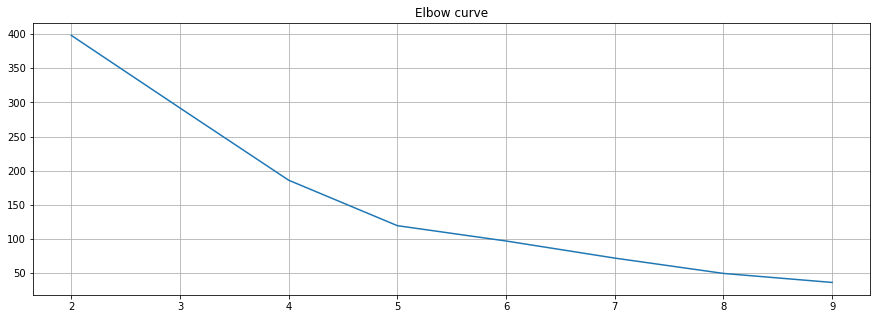

In [38]:
distorsions = []

x = model.docvecs.doctag_syn0

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    res.append(np.average(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)))
    # distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [21]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', max_iter=100)
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()


pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)

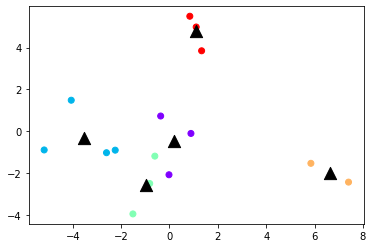

In [35]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

cs = matplotlib.cm.rainbow(np.linspace(0, 1, 5))
colors = [cs[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=colors)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

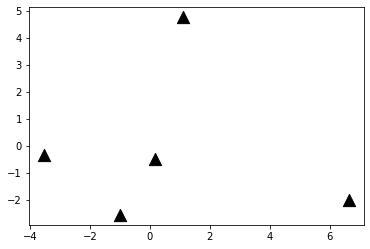